# Results overview

This notebook highlights the key insights of experiment outcomes.

In [1]:
import json

import pandas as pd

from results import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

## Read results

In [2]:
results_gf = load_results_from_csv(ec_name='Gridflex')

In [3]:
results_gm = load_results_from_csv(ec_name='GroeneMient')

## Prepare results

In [14]:
number_of_steps = 365
number_of_simulation_runs = 10

In [24]:
same_levers, unique_levers = get_unique_levers_dict()

setting up the experiments...



### Extracting model performance matrix

In [6]:
# Results to be printed
for experiment, runs in results_gf.items():
    column_names = list(runs.columns)[1:]
    break

column_names = column_names[1:]
print(column_names)

['M1: realised_demand', 'M2: scheduled_demand', 'M3: shifted_load', 'M4: total_generation', 'M5: savings_on_ToD', 'M6: energy_costs']


### Separate results for each experiment setup

In [12]:
results_gm = separate_experiment_setups(results=results_gm, number_of_steps=number_of_steps,
                                        number_of_simulation_runs=number_of_simulation_runs)

NameError: name 'results_gm' is not defined

In [15]:
results_gf = separate_experiment_setups(results=results_gf, number_of_steps=number_of_steps,
                                        number_of_simulation_runs=number_of_simulation_runs)

In [23]:
same_levers

NameError: name 'same_levers' is not defined

In [10]:
unique_levers

,L1,L2,L3,lever information
0,0.00,0.1,0.10,L1:B L2:B L3:B
1,0.00,0.1,0.45,L1:B L2:B L3:None
2,0.00,0.1,0.90,L1:B L2:B L3:V
3,0.00,0.5,0.10,L1:B L2:O L3:B
4,0.00,0.5,0.45,L1:B L2:O L3:None
5,0.00,0.5,0.90,L1:B L2:O L3:V
6,0.00,1.0,0.10,L1:B L2:V L3:B
7,0.00,1.0,0.45,L1:B L2:V L3:None
8,0.00,1.0,0.90,L1:B L2:V L3:V
9,0.50,0.1,0.10,L1:None L2:B L3:B


In [11]:
experiment_test = Experiment()
experimental_conditions = experiment_test.prepare_experiment_setup()

setting up the experiments...



In [12]:
experimental_conditions

,X1,X2,X3,L1,L2,L3
0,0.4,0.5,0.5,0.00,0.1,0.10
1,0.4,0.5,0.5,0.00,0.1,0.45
2,0.4,0.5,0.5,0.00,0.1,0.90
3,0.4,0.5,0.5,0.00,0.5,0.10
4,0.4,0.5,0.5,0.00,0.5,0.45
...,...,...,...,...,...,...
211,0.8,1.0,0.9,0.75,0.5,0.45
212,0.8,1.0,0.9,0.75,0.5,0.90
213,0.8,1.0,0.9,0.75,1.0,0.10
214,0.8,1.0,0.9,0.75,1.0,0.45


## Plotting important uncertainty scenarios

Three important uncertainty scenarios are plotted in the following section

| Uncertainty Scenarios                                 | X1  | X2  | X3  |
|-------------------------------------------------------|-----|-----|-----|
| 'low availability of overall flexible demand'         | 0.4 | 0.5 | 0.5 |
| 'higher availability of overall flexible load'        | 0.8 | 1.0 | 0.9 |
| 'low availability of non-residential flexible demand' | 0.8 | 0.5 | 0.9 |

In [13]:
uncertainty_scenarios = {'low availability of overall flexible demand': experimental_conditions.loc[
    (experimental_conditions['X1'] == 0.4) & (experimental_conditions['X2'] == 0.5) & (
            experimental_conditions['X3'] == 0.5)].index.to_list(),
                         'higher availability of overall flexible load': experimental_conditions.loc[
                             (experimental_conditions['X1'] == 0.8) & (experimental_conditions['X2'] == 1) & (
                                     experimental_conditions['X3'] == 0.9)].index.to_list(),
                         'low availability of non-residential flexible demand': experimental_conditions.loc[
                             (experimental_conditions['X1'] == 0.8) & (experimental_conditions['X2'] == 0.5) & (
                                     experimental_conditions['X3'] == 0.9)].index.to_list()
                         }


### Plotting results for gridflex

100%|██████████| 3/3 [06:13<00:00, 124.64s/it]


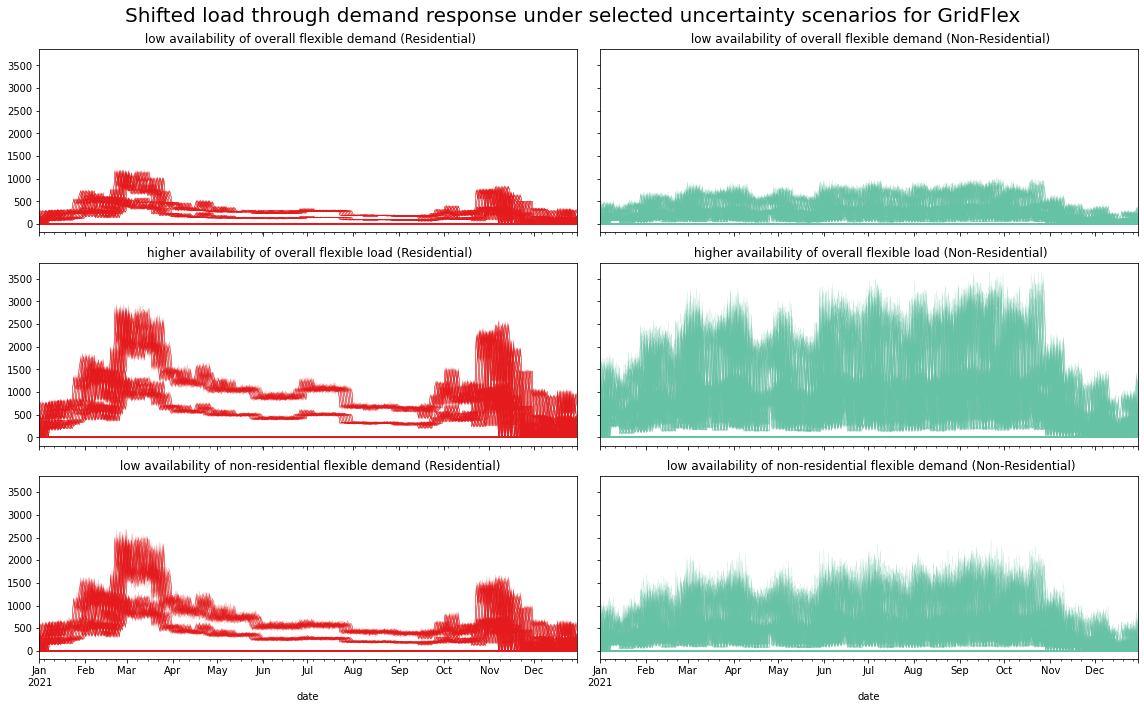

In [30]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, squeeze=True, figsize=(16, 10))
axs_index = [[axs[0, 0], axs[0, 1]], [axs[1, 0], axs[1, 1]], [axs[2, 0], axs[2, 1]]]
fig.suptitle('Shifted load through demand response under selected uncertainty scenarios for GridFlex', fontsize=20)

ax_id = 0
for key in tqdm(uncertainty_scenarios.keys()):
    experiment_setups = uncertainty_scenarios[key]
    # iterate through every experiment setup listed in
    for experiment_setup in experiment_setups:
        results = results_gf[str(experiment_setup)]
        # result contain ten iteration of results for each simulation run
        # iterate through simulation runs
        ax = axs_index[ax_id]
        for result in results:
            shifted_load = extract_df_from_json(result, 'M3: shifted_load')
            shifted_load = shifted_load[:364]
            shifted_load['date'] = pd.date_range(start='1/1/2021', periods=len(shifted_load), freq='D')
            shifted_load.set_index('date', inplace=True, drop=True)

            residential = shifted_load.columns.to_list()[:-2]
            nonresidential = shifted_load.columns.to_list()[-2:]
            # calculate total results for residential and non-residential community members
            shifted_load['residential'] = shifted_load.loc[:, residential].sum(axis=1)
            shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1)
            # shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1) / 4
            # remove unwanted columns
            columns_to_keep = ['residential', 'nonresidential']
            shifted_load = shifted_load[columns_to_keep]
            # Set lower cap to zero
            shifted_load[shifted_load < 0] = 0

            # plot results for community members
            shifted_load['residential'].plot(ax=ax[0], colormap='Set1', legend=False, linewidth=0.2, alpha=0.5)
            shifted_load['nonresidential'].plot(ax=ax[1], colormap='Set2', legend=False, linewidth=0.2, alpha=0.5)
            ax[0].set_title(f" {key} (Residential)", fontsize=12)
            ax[1].set_title(f" {key} (Non-Residential)", fontsize=12)

    ax_id += 1

plt.tight_layout()
plt.savefig('figures/uncertainty_scenarios_gf.png', dpi=300)

### Plotting results for Groene Mient

100%|██████████| 3/3 [05:49<00:00, 116.44s/it]


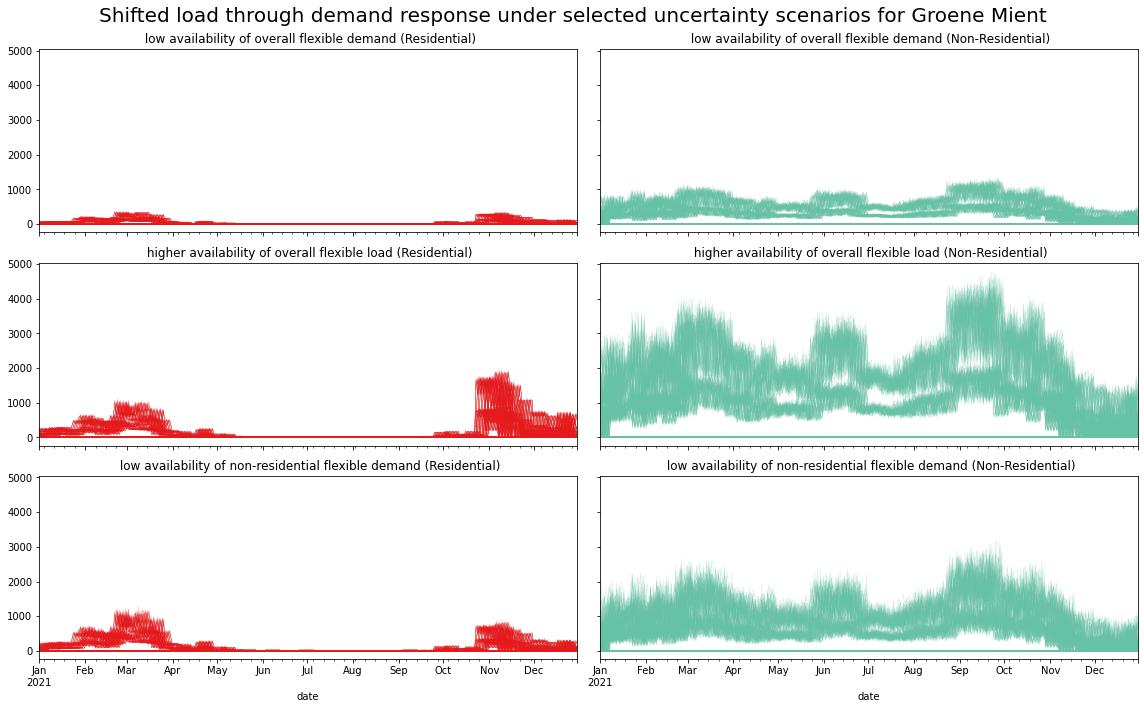

In [31]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, squeeze=True, figsize=(16, 10))
axs_index = [[axs[0, 0], axs[0, 1]], [axs[1, 0], axs[1, 1]], [axs[2, 0], axs[2, 1]]]
fig.suptitle('Shifted load through demand response under selected uncertainty scenarios for Groene Mient', fontsize=20)

ax_id = 0
for key in tqdm(uncertainty_scenarios.keys()):
    experiment_setups = uncertainty_scenarios[key]
    # iterate through every experiment setup listed in
    for experiment_setup in experiment_setups:
        results = results_gm[str(experiment_setup)]
        # result contain ten iteration of results for each simulation run
        # iterate through simulation runs
        ax = axs_index[ax_id]
        for result in results:
            shifted_load = extract_df_from_json(result, 'M3: shifted_load')
            shifted_load = shifted_load[:364]
            shifted_load['date'] = pd.date_range(start='1/1/2021', periods=len(shifted_load), freq='D')
            shifted_load.set_index('date', inplace=True, drop=True)

            residential = shifted_load.columns.to_list()[:-1]
            nonresidential = shifted_load.columns.to_list()[-1:]
            # calculate total results for residential and non-residential community members
            shifted_load['residential'] = shifted_load.loc[:, residential].sum(axis=1)
            # shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1) / 4
            shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1)
            # remove unwanted columns
            columns_to_keep = ['residential', 'nonresidential']
            shifted_load = shifted_load[columns_to_keep]
            # Set lower cap to zero
            shifted_load[shifted_load < 0] = 0

            # plot results for community members
            shifted_load['residential'].plot(ax=ax[0], colormap='Set1', legend=False, linewidth=0.2, alpha=0.5)
            shifted_load['nonresidential'].plot(ax=ax[1], colormap='Set2', legend=False, linewidth=0.2, alpha=0.5)
            ax[0].set_title(f" {key} (Residential)", fontsize=12)
            ax[1].set_title(f" {key} (Non-Residential)", fontsize=12)

    ax_id += 1

plt.tight_layout()
plt.savefig('figures/uncertainty_scenarios_gm.png', dpi=300)

## Plotting selected policy scenarios

Three selected policy scenarios are plotted in the following section

| Uncertainty Scenarios                           | L1  | L2  | L3  |
|-------------------------------------------------|-----|-----|-----|
| 'Baseline (no demand response)'                 | 0.0 | 0.1 | 0.1 |
| 'Optimistic demand response participation'      | 5.0 | 0.5 | 0.45 |
| 'Very optimistic demand response participation' | 7.5 | 1.0 | 0.9 |

In [25]:
policy_scenarios = {'Baseline (no demand response)': experimental_conditions.loc[
    (experimental_conditions['L1'] == 0.0) & (experimental_conditions['L2'] == 0.1) & (
            experimental_conditions['L3'] == 0.1)].index.to_list(),
                    'Optimistic demand response participation': experimental_conditions.loc[
                        (experimental_conditions['L1'] == 0.5) & (experimental_conditions['L2'] == 0.5) & (
                                experimental_conditions['L3'] == 0.45)].index.to_list(),
                    'Very optimistic demand response participation': experimental_conditions.loc[
                        (experimental_conditions['L1'] == 0.75) & (experimental_conditions['L2'] == 1) & (
                                experimental_conditions['L3'] == 0.9)].index.to_list()
                    }

100%|██████████| 3/3 [01:31<00:00, 30.43s/it]


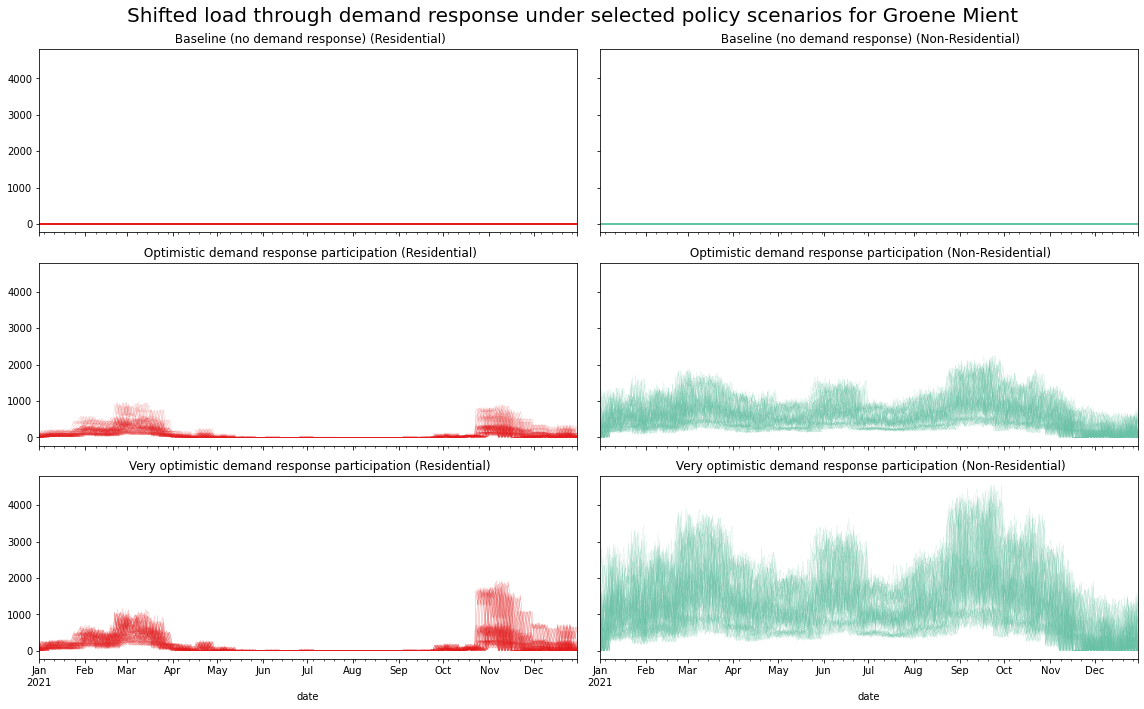

In [28]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, squeeze=True, figsize=(16, 10))
axs_index = [[axs[0, 0], axs[0, 1]], [axs[1, 0], axs[1, 1]], [axs[2, 0], axs[2, 1]]]
fig.suptitle('Shifted load through demand response under selected policy scenarios for Groene Mient', fontsize=20)

ax_id = 0
for key in tqdm(policy_scenarios.keys()):
    experiment_setups = policy_scenarios[key]
    # iterate through every experiment setup listed in
    for experiment_setup in experiment_setups:
        results = results_gm[str(experiment_setup)]
        # result contain ten iteration of results for each simulation run
        # iterate through simulation runs
        ax = axs_index[ax_id]
        for result in results:
            shifted_load = extract_df_from_json(result, 'M3: shifted_load')
            shifted_load = shifted_load[:364]
            shifted_load['date'] = pd.date_range(start='1/1/2021', periods=len(shifted_load), freq='D')
            shifted_load.set_index('date', inplace=True, drop=True)

            residential = shifted_load.columns.to_list()[:-1]
            nonresidential = shifted_load.columns.to_list()[-1:]
            # calculate total results for residential and non-residential community members
            shifted_load['residential'] = shifted_load.loc[:, residential].sum(axis=1)
            # shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1) / 4
            shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1)
            # remove unwanted columns
            columns_to_keep = ['residential', 'nonresidential']
            shifted_load = shifted_load[columns_to_keep]
            # Set lower cap to zero
            shifted_load[shifted_load < 0] = 0

            # plot results for community members
            shifted_load['residential'].plot(ax=ax[0], colormap='Set1', legend=False, linewidth=0.2, alpha=0.5)
            shifted_load['nonresidential'].plot(ax=ax[1], colormap='Set2', legend=False, linewidth=0.2, alpha=0.5)
            ax[0].set_title(f" {key} (Residential)", fontsize=12)
            ax[1].set_title(f" {key} (Non-Residential)", fontsize=12)

    ax_id += 1

plt.tight_layout()
plt.savefig('figures/policy_scenarios_gm.png', dpi=300)

100%|██████████| 3/3 [01:45<00:00, 35.26s/it]


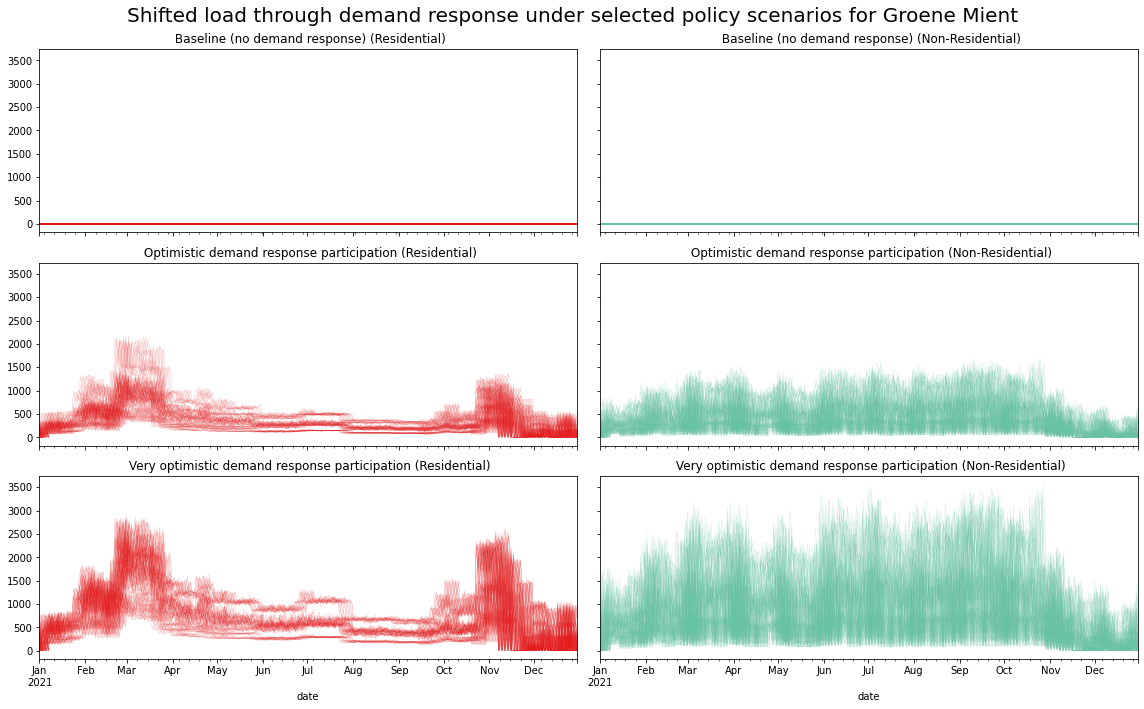

In [29]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, squeeze=True, figsize=(16, 10))
axs_index = [[axs[0, 0], axs[0, 1]], [axs[1, 0], axs[1, 1]], [axs[2, 0], axs[2, 1]]]
fig.suptitle('Shifted load through demand response under selected policy scenarios for Groene Mient', fontsize=20)

ax_id = 0
for key in tqdm(policy_scenarios.keys()):
    experiment_setups = policy_scenarios[key]
    # iterate through every experiment setup listed in
    for experiment_setup in experiment_setups:
        results = results_gf[str(experiment_setup)]
        # result contain ten iteration of results for each simulation run
        # iterate through simulation runs
        ax = axs_index[ax_id]
        for result in results:
            shifted_load = extract_df_from_json(result, 'M3: shifted_load')
            shifted_load = shifted_load[:364]
            shifted_load['date'] = pd.date_range(start='1/1/2021', periods=len(shifted_load), freq='D')
            shifted_load.set_index('date', inplace=True, drop=True)

            residential = shifted_load.columns.to_list()[:-2]
            nonresidential = shifted_load.columns.to_list()[-2:]
            # calculate total results for residential and non-residential community members
            shifted_load['residential'] = shifted_load.loc[:, residential].sum(axis=1)
            shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1)
            # shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1) / 4
            # remove unwanted columns
            columns_to_keep = ['residential', 'nonresidential']
            shifted_load = shifted_load[columns_to_keep]
            # Set lower cap to zero
            shifted_load[shifted_load < 0] = 0

            # plot results for community members
            shifted_load['residential'].plot(ax=ax[0], colormap='Set1', legend=False, linewidth=0.2, alpha=0.5)
            shifted_load['nonresidential'].plot(ax=ax[1], colormap='Set2', legend=False, linewidth=0.2, alpha=0.5)
            ax[0].set_title(f" {key} (Residential)", fontsize=12)
            ax[1].set_title(f" {key} (Non-Residential)", fontsize=12)

    ax_id += 1

plt.tight_layout()
plt.savefig('figures/policy_scenarios_gf.png', dpi=300)

In [32]:
## Plotting overview of results for Groene Mient

100%|██████████| 3/3 [03:53<00:00, 77.99s/it]


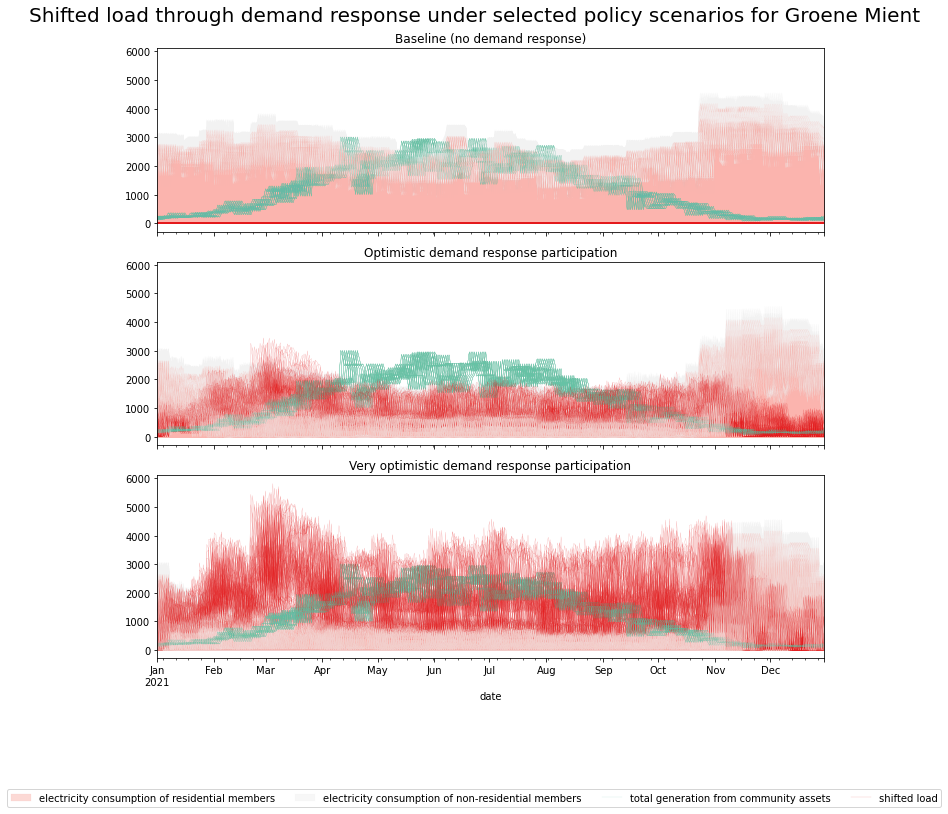

In [44]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, squeeze=True, figsize=(10, 10))
axs_index = [axs[0], axs[1], axs[2]]
fig.suptitle('Shifted load through demand response under selected policy scenarios for Groene Mient', fontsize=20)

ax_id = 0
for key in tqdm(policy_scenarios.keys()):
    experiment_setups = policy_scenarios[key]
    # iterate through every experiment setup listed in
    for experiment_setup in experiment_setups:
        results = results_gf[str(experiment_setup)]
        # result contain ten iteration of results for each simulation run
        # iterate through simulation runs
        ax = axs_index[ax_id]
        for result in results:
            realised_demand = extract_df_from_json(result, 'M1: realised_demand')
            realised_demand = realised_demand[:364]
            realised_demand['date'] = pd.date_range(start='1/1/2021', periods=len(realised_demand), freq='D')
            realised_demand.set_index('date', inplace=True, drop=True)

            generation = extract_df_from_json(result, 'M4: total_generation')
            generation['date'] = pd.date_range(start='1/1/2021', periods=len(realised_demand), freq='D')
            generation.set_index('date', inplace=True, drop=True)

            residential = realised_demand.columns.to_list()[:-1]
            non_residential = realised_demand.columns.to_list()[-1:]

            # calculate total results for residential and non-residential community members
            realised_demand['residential'] = realised_demand.loc[:, residential].sum(axis=1)
            realised_demand['non_residential'] = realised_demand.loc[:, non_residential].sum(axis=1)

            columns_to_keep = ['residential', 'non_residential']
            realised_demand = realised_demand[columns_to_keep]

            # set lower cap to zero
            realised_demand[realised_demand < 0] = 0

            shifted_load = extract_df_from_json(result, 'M3: shifted_load')
            shifted_load = shifted_load[:364]
            shifted_load['date'] = pd.date_range(start='1/1/2021', periods=len(shifted_load), freq='D')
            shifted_load.set_index('date', inplace=True, drop=True)

            residential = shifted_load.columns.to_list()[:-2]
            nonresidential = shifted_load.columns.to_list()[-2:]
            # calculate total results for residential and non-residential community members
            shifted_load['residential'] = shifted_load.loc[:, residential].sum(axis=1)
            # shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1) / 4
            shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1)
            shifted_load['total'] = shifted_load['residential'] + shifted_load['nonresidential']
            # remove unwanted columns
            columns_to_keep = ['total']
            shifted_load = shifted_load[columns_to_keep]
            # Set lower cap to zero
            shifted_load[shifted_load < 0] = 0

            # plot results for community members

            realised_demand.plot(ax=ax, colormap='Pastel1', kind='area', stacked=True, legend=False, linewidth=0.2,
                                 alpha=0.5, )
            generation.plot(ax=ax, colormap='Set2', legend=False, linewidth=0.2, alpha=0.5, )
            shifted_load['total'].plot(ax=ax, colormap='Set1', legend=False, linewidth=0.2, alpha=0.5)
            ax.set_title(f"{key}", fontsize=12)

    ax_id += 1

# show legends
handles, labels = ax.get_legend_handles_labels()
labels = ['electricity consumption of residential members', 'electricity consumption of non-residential members',
          'total generation from community assets', 'shifted load']
fig.legend(handles[:4], labels[:4], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig('figures/policy_scenarios_gm_overview.png', dpi=300)

100%|██████████| 3/3 [04:18<00:00, 86.14s/it]


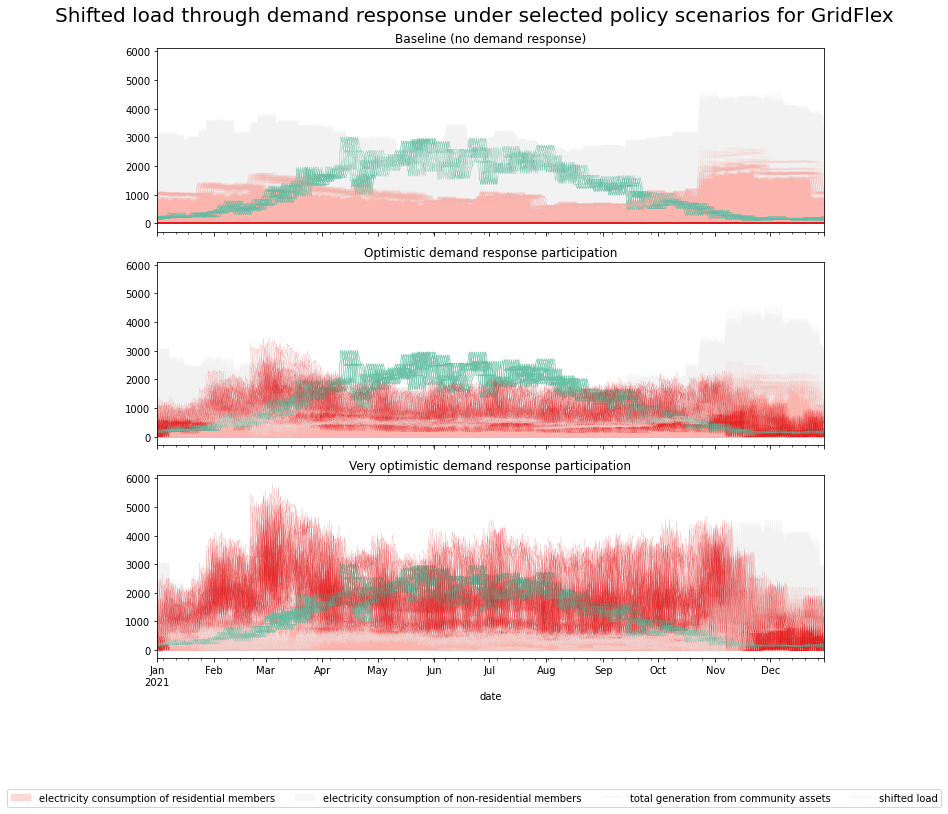

In [45]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, squeeze=True, figsize=(10, 10))
axs_index = [axs[0], axs[1], axs[2]]
fig.suptitle('Shifted load through demand response under selected policy scenarios for GridFlex', fontsize=20)

ax_id = 0
for key in tqdm(policy_scenarios.keys()):
    experiment_setups = policy_scenarios[key]
    # iterate through every experiment setup listed in
    for experiment_setup in experiment_setups:
        results = results_gf[str(experiment_setup)]
        # result contain ten iteration of results for each simulation run
        # iterate through simulation runs
        ax = axs_index[ax_id]
        for result in results:
            realised_demand = extract_df_from_json(result, 'M1: realised_demand')
            realised_demand = realised_demand[:364]
            realised_demand['date'] = pd.date_range(start='1/1/2021', periods=len(realised_demand), freq='D')
            realised_demand.set_index('date', inplace=True, drop=True)

            generation = extract_df_from_json(result, 'M4: total_generation')
            generation['date'] = pd.date_range(start='1/1/2021', periods=len(realised_demand), freq='D')
            generation.set_index('date', inplace=True, drop=True)

            residential = realised_demand.columns.to_list()[:-2]
            non_residential = realised_demand.columns.to_list()[-2:]

            # calculate total results for residential and non-residential community members
            realised_demand['residential'] = realised_demand.loc[:, residential].sum(axis=1)
            realised_demand['non_residential'] = realised_demand.loc[:, non_residential].sum(axis=1)

            columns_to_keep = ['residential', 'non_residential']
            realised_demand = realised_demand[columns_to_keep]

            # set lower cap to zero
            realised_demand[realised_demand < 0] = 0

            shifted_load = extract_df_from_json(result, 'M3: shifted_load')
            shifted_load = shifted_load[:364]
            shifted_load['date'] = pd.date_range(start='1/1/2021', periods=len(shifted_load), freq='D')
            shifted_load.set_index('date', inplace=True, drop=True)

            residential = shifted_load.columns.to_list()[:-2]
            nonresidential = shifted_load.columns.to_list()[-2:]
            # calculate total results for residential and non-residential community members
            shifted_load['residential'] = shifted_load.loc[:, residential].sum(axis=1)
            # shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1) / 4
            shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1)
            shifted_load['total'] = shifted_load['residential'] + shifted_load['nonresidential']
            # remove unwanted columns
            columns_to_keep = ['total']
            shifted_load = shifted_load[columns_to_keep]
            # Set lower cap to zero
            shifted_load[shifted_load < 0] = 0

            # plot results for community members

            realised_demand.plot(ax=ax, colormap='Pastel1', kind='area', stacked=True, legend=False, linewidth=0.2,
                                 alpha=0.5, )
            generation.plot(ax=ax, colormap='Set2', legend=False, linewidth=0.2, alpha=0.5, )
            shifted_load['total'].plot(ax=ax, colormap='Set1', legend=False, linewidth=0.2, alpha=0.5)
            ax.set_title(f"{key}", fontsize=12)

    ax_id += 1

# show legends
handles, labels = ax.get_legend_handles_labels()
labels = ['electricity consumption of residential members', 'electricity consumption of non-residential members',
          'total generation from community assets', 'shifted load']
fig.legend(handles[:4], labels[:4], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig('figures/policy_scenarios_gf_overview.png', dpi=300)

_______

# Trying new data structure for the results

## 1. Read results

In [3]:
%time
results_gf = load_results_from_csv(ec_name='Gridflex')

CPU times: total: 0 ns
Wall time: 0 ns


## 2. Prepare results

In [4]:
results_gf = add_experiment_setup_details(results_gf)

setting up the experiments...

starting the iteration through results...


100%|██████████| 216/216 [00:23<00:00,  9.31it/s]


In [ ]:
results_gf = create_results_df(results_gf)

100%|██████████| 216/216 [02:54<00:00,  1.24it/s]


In [138]:
result_matrices = calculate_key_matrices(results_gf)

calculating total, total_residential, mean_residential , total_non_residential value for ['M1: realised_demand', 'M2: scheduled_demand', 'M3: shifted_load', 'M5: savings_on_ToD', 'M6: energy_costs']...


100%|██████████| 788400/788400 [15:47<00:00, 832.48it/s]  


In [143]:
%time
result_matrices = pd.DataFrame.from_dict(result_matrices).T

CPU times: total: 0 ns
Wall time: 0 ns


In [144]:
result_matrices

{0: {'M1_total': 2859.5790293815085,
  'M1_total_residential': 1080.8184692215082,
  'M1_mean_residential': 22.05751978003078,
  'M1_total_non_residential': 1778.7605601600003,
  'M2_total': 2929.773987941509,
  'M2_total_residential': 1143.2139879415083,
  'M2_mean_residential': 23.330897713092007,
  'M2_total_non_residential': 1786.56,
  'M3_total': 0,
  'M3_total_residential': 0,
  'M3_mean_residential': 0.0,
  'M3_total_non_residential': 0,
  'M5_total': 0.0,
  'M5_total_residential': 0.0,
  'M5_mean_residential': 0.0,
  'M5_total_non_residential': 0.0,
  'M6_total': 874.5753590793792,
  'M6_total_residential': 357.325082860324,
  'M6_mean_residential': 7.292348629802531,
  'M6_total_non_residential': 517.2502762190552},
 1: {'M1_total': 2859.5790293815085,
  'M1_total_residential': 1080.8184692215082,
  'M1_mean_residential': 22.05751978003078,
  'M1_total_non_residential': 1778.7605601600003,
  'M2_total': 2929.773987941509,
  'M2_total_residential': 1143.2139879415083,
  'M2_mea